# NBA Hall of Fame Workbook

In [1608]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import f1_score, confusion_matrix,\
recall_score, precision_score, accuracy_score, log_loss,\
roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split, KFold, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix



warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100

## Data Import

In [1609]:
nba = pd.read_csv("data/Seasons_Stats.csv", index_col = 0)

In [1615]:
nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


## Data Cleaning

### Cleaning the NBA Dataframe

In [1616]:
nba['Year'] = np.where((nba['Year'].isna()), 1950, nba['Year'])
nba['Age'] = np.where((nba['Age'].isna()), nba['Age'].mean(), nba['Age'])

In [1617]:
integer_types = ['Year', 'Age']

nba[integer_types] = nba[integer_types].astype(int)
nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950,Curly Armstrong,G-F,31,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950,Cliff Barker,SG,29,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950,Leo Barnhorst,SF,25,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950,Ed Bartels,F,24,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950,Ed Bartels,F,24,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


## Feature Engineering

#### Reading in Separate Dataframe to Capture NBA Champions

In [1618]:
champs = pd.read_csv("data/champions.csv")

In [1619]:
champs.head()

,Year,League,Champion,Tm,Runner_Up,Runner_Up_Code
0,2020,NBA,Los Angeles Lakers,LAL,Miami Heat,LAL
1,2019,NBA,Toronto Raptors,TOR,Golden State Warriors,TOR
2,2018,NBA,Golden State Warriors,GSW,Cleveland Cavaliers,GSW
3,2017,NBA,Golden State Warriors,GSW,Cleveland Cavaliers,GSW
4,2016,NBA,Cleveland Cavaliers,CLE,Golden State Warriors,CLE


### Reading in Separate Dataframe to Capture NBA All-Stars

In [1620]:
all_stars = pd.read_csv("data/all_stars.csv", encoding='latin-1')
all_stars.head()

,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 25,MP.1,PTS.1,TRB.1,AST.1
0,Kareem Abdul-Jabbar,18,13.0,449.0,105,213,0.493,0.0,1.0,0.000,105,212,0.495,41,50,0.820,33.0,84.0,149,51,6.0,31.0,28.0,57,251,NaN,24.9,13.9,8.3,2.8
1,LeBron James,17,17.0,473.0,161,310,0.519,38.0,119.0,0.319,123,191,0.644,29,40,0.725,13.0,90.0,103,98,19.0,7.0,55.0,18,389,NaN,27.8,22.9,6.1,5.8
2,Kobe Bryant,15,15.0,415.0,119,238,0.500,22.0,68.0,0.324,97,170,0.571,30,38,0.789,28.0,47.0,75,70,38.0,6.0,35.0,35,290,NaN,27.7,19.3,5.0,4.7
3,Tim Duncan,15,12.0,311.0,63,115,0.548,1.0,4.0,0.250,62,111,0.559,13,17,0.765,38.0,98.0,136,31,13.0,8.0,31.0,16,140,NaN,20.7,9.3,9.1,2.1
4,Kevin Garnett,14,11.0,287.0,72,141,0.511,0.0,4.0,0.000,72,137,0.526,14,16,0.875,25.0,63.0,88,40,16.0,11.0,20.0,10,158,NaN,20.5,11.3,6.3,2.9


In [1621]:
all_stars_new = all_stars[['Player', 'G']]

### Reading in Player Data for Supplementary Statistics

In [1622]:
player_data = pd.read_csv("data/player_data.csv")
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [1623]:
player_data.shape

(4550, 8)

In [1624]:
player_data['seasons'] = player_data['year_end'] - player_data['year_start']
player_data['HOF_Q'] = np.where((player_data['year_end'] <= 2014), 1, 0)

player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college,seasons,HOF_Q
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,4,1
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,9,1
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",19,1
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,10,1
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,5,1


### Reading in MVP Dataframe

In [1625]:
nba_mvp = pd.read_csv("data/mvp_agg.csv")
nba_mvp.head()

,Player,MVP
0,Kareem Abdul-Jabbar,6
1,Michael Jordan,5
2,Bill Russell,5
3,Wilt Chamberlain,4
4,LeBron James,4


### Reading Defensive Player of the Year Data

In [1626]:
nba_dpoy = pd.read_csv("data/dpoy.csv")
nba_dpoy.head()

,Player,DPOY
0,Dikembe Mutombo,4
1,Ben Wallace,4
2,Dwight Howard,3
3,Mark Eaton,2
4,Rudy Gobert,2


### Reading in Finals MVP Data

In [1627]:
finals_mvp = pd.read_csv("data/finals_mvp.csv")
finals_mvp.head()

,Player,Finals_MVP
0,Michael Jordan,6
1,LeBron James,4
2,Tim Duncan,3
3,Magic Johnson,3
4,Shaquille O'Neal,3


### Removing Total Index Values

In [1628]:
nba = nba[nba.Tm != 'TOT']

### Adding Indexes for Comparing Datasets

#### Generating Hall of Fame Categorical Target Variable

In [1629]:
nba['HOF'] = [1 if x == True else 0 for x in nba['Player'].str.endswith('*')]

In [1630]:
nba['HOF'].value_counts()

0    21082
1     1486
Name: HOF, dtype: int64

#### Adding Categorical Variables for Championship Teams & All Star Appearances

In [1631]:
nba['concat'] = nba['Year'].astype(str) + nba['Tm']
champs['concat'] = champs['Year'].astype(str) + champs['Tm']
champs['runner_up'] = champs['Year'].astype(str) + champs['Runner_Up_Code']

nba['champ'] = nba['concat'].isin(champs['concat']).astype(int)
nba['runner_up'] = nba['concat'].isin(champs['runner_up']).astype(int)


nba['all_star'] = nba['Player'].isin(all_stars['Player']).astype(int)
nba['teams'] = nba.groupby('Player')['Tm'].transform('count')
nba['Player'] = nba['Player'].str.replace('*', '')
nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,HOF,concat,champ,runner_up,all_star,teams
0,1950,Curly Armstrong,G-F,31,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,0,1950FTW,0,0,0,2.0
1,1950,Cliff Barker,SG,29,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,0,1950INO,0,0,0,3.0
2,1950,Leo Barnhorst,SF,25,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,0,1950CHS,0,0,1,4.0
4,1950,Ed Bartels,F,24,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0,0,1950DNN,0,0,0,3.0
5,1950,Ed Bartels,F,24,NYK,2.0,NaN,NaN,NaN,0.376,NaN,0.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0.250,NaN,NaN,NaN,1.0,4.0,0.250,0.250,2.0,3.0,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0,0,1950NYK,0,0,0,3.0


### Group Dataframe by Player Name

In [1633]:
nba_total = nba.groupby(['Player', 'Year']).agg({'PTS': ['sum'], 'AST': ['sum'], 'TOV': ['sum'], 'ORB': ['sum'], 'DRB': ['sum'],'TRB': ['sum'], 'BLK': ['sum'], 'STL': ['sum'], 'G': ['sum'], 'GS': ['sum'], 'MP': ['sum'], 'FG': ['sum'], 'FGA': ['sum'], '3P': ['sum'], '3PA': ['sum'], 'FT': ['sum'], 'FTA': ['sum'], 'PF': ['sum'], 'HOF': ['sum'], 'champ': ['sum'], 'runner_up': ['sum']})
nba_total.columns = ['PTS', 'AST', 'TOV', 'ORB', 'DRB','TRB', 'BLK', 'STL', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'PF', 'HOF', 'champ', 'runner_up']
nba_total = nba_total.reset_index()
nba_total.head()

,Player,Year,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,G,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up
0,A.C. Green,1986,521.0,54.0,99.0,160.0,221.0,381.0,49.0,49.0,82.0,1.0,1542.0,209.0,388.0,1.0,6.0,102.0,167.0,229.0,0,0,0
1,A.C. Green,1987,852.0,84.0,102.0,210.0,405.0,615.0,80.0,70.0,79.0,72.0,2240.0,316.0,587.0,0.0,5.0,220.0,282.0,171.0,0,1,0
2,A.C. Green,1988,937.0,93.0,120.0,245.0,465.0,710.0,45.0,87.0,82.0,64.0,2636.0,322.0,640.0,0.0,2.0,293.0,379.0,204.0,0,1,0
3,A.C. Green,1989,1088.0,103.0,119.0,258.0,481.0,739.0,55.0,94.0,82.0,82.0,2510.0,401.0,758.0,4.0,17.0,282.0,359.0,172.0,0,0,1
4,A.C. Green,1990,1061.0,90.0,116.0,262.0,450.0,712.0,50.0,66.0,82.0,82.0,2709.0,385.0,806.0,13.0,46.0,278.0,370.0,207.0,0,0,0


#### Adding Years in the League Variable before Reshaping Dataframe

In [1636]:
nba_total['yrs_in_lg'] = np.where((nba_total['Year'] >= 1950), 1, 0)
nba_total['HOF_Q'] = np.where((nba_total['Year'] >= 2014), 0, 1)

#### Reshaping Dataframe by Groupby to Eliminate Duplicate Years

In [1637]:
nba_total = nba_total.groupby(['Player'], dropna = False)[['PTS', 'AST', 'TOV', 'ORB', 'DRB','TRB', 'BLK', 'STL', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'PF', 'HOF', 'champ', 'runner_up', 'yrs_in_lg', 'HOF_Q']].sum().reset_index()
nba_total.head()

,Player,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,G,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up,yrs_in_lg,HOF_Q
0,A.C. Green,12331.0,1400.0,1434.0,3354.0,6119.0,9473.0,546.0,1033.0,1278.0,832.0,36552.0,4544.0,9202.0,124.0,489.0,3119.0,4250.0,2436.0,0,3,2,16,16
1,A.J. Bramlett,8.0,0.0,3.0,12.0,10.0,22.0,0.0,1.0,8.0,0.0,61.0,4.0,21.0,0.0,0.0,0.0,0.0,13.0,0,0,0,1,1
2,A.J. English,1502.0,320.0,203.0,140.0,175.0,315.0,24.0,57.0,151.0,18.0,3108.0,617.0,1418.0,9.0,65.0,259.0,333.0,287.0,0,0,0,2,2
3,A.J. Guyton,442.0,147.0,62.0,22.0,58.0,80.0,12.0,20.0,80.0,14.0,1246.0,166.0,440.0,73.0,193.0,37.0,45.0,58.0,0,0,0,3,3
4,A.J. Hammons,48.0,4.0,10.0,8.0,28.0,36.0,13.0,1.0,22.0,0.0,163.0,17.0,42.0,5.0,10.0,9.0,20.0,21.0,0,0,0,1,0


#### Adding Teams Played for by Player

In [1639]:
nba_slice = nba.groupby('Player')['teams'].mean()
nba_total = pd.merge(nba_total, nba_slice, on = 'Player', how = 'left')

#### Adding MVP Winners

In [1640]:
nba_total = pd.merge(nba_total, nba_mvp, on = 'Player', how = 'left')

#### Adding DPOY Winners

In [1641]:
nba_total = pd.merge(nba_total, nba_dpoy, on = 'Player', how = 'left')

#### Adding Finals MVP Winners

In [1642]:
nba_total = pd.merge(nba_total, finals_mvp, on = 'Player', how = 'left')

In [1643]:
nba_total.shape

(3919, 28)

In [1644]:
nba_total.isna().sum()

Player           0
PTS              0
AST              0
TOV              0
ORB              0
DRB              0
TRB              0
BLK              0
STL              0
G                0
GS               0
MP               0
FG               0
FGA              0
3P               0
3PA              0
FT               0
FTA              0
PF               0
HOF              0
champ            0
runner_up        0
yrs_in_lg        0
HOF_Q            0
teams            0
MVP           3878
DPOY          3897
Finals_MVP    3889
dtype: int64

In [1645]:
nba_total.head()

,Player,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,G,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up,yrs_in_lg,HOF_Q,teams,MVP,DPOY,Finals_MVP
0,A.C. Green,12331.0,1400.0,1434.0,3354.0,6119.0,9473.0,546.0,1033.0,1278.0,832.0,36552.0,4544.0,9202.0,124.0,489.0,3119.0,4250.0,2436.0,0,3,2,16,16,17.0,NaN,NaN,NaN
1,A.J. Bramlett,8.0,0.0,3.0,12.0,10.0,22.0,0.0,1.0,8.0,0.0,61.0,4.0,21.0,0.0,0.0,0.0,0.0,13.0,0,0,0,1,1,1.0,NaN,NaN,NaN
2,A.J. English,1502.0,320.0,203.0,140.0,175.0,315.0,24.0,57.0,151.0,18.0,3108.0,617.0,1418.0,9.0,65.0,259.0,333.0,287.0,0,0,0,2,2,2.0,NaN,NaN,NaN
3,A.J. Guyton,442.0,147.0,62.0,22.0,58.0,80.0,12.0,20.0,80.0,14.0,1246.0,166.0,440.0,73.0,193.0,37.0,45.0,58.0,0,0,0,3,3,3.0,NaN,NaN,NaN
4,A.J. Hammons,48.0,4.0,10.0,8.0,28.0,36.0,13.0,1.0,22.0,0.0,163.0,17.0,42.0,5.0,10.0,9.0,20.0,21.0,0,0,0,1,0,1.0,NaN,NaN,NaN


### Bringing in All Star Totals for players

In [1647]:
nba_total = pd.merge(nba_total, all_stars_new, on = 'Player', how = 'left')
nba_total.rename(columns = {'G_y':'all_star_app'}, inplace = True)

### Creating In-Game Statistics

In [1648]:
nba_total['PPG'] = nba_total.PTS/nba_total.G_x
nba_total['APG'] = nba_total.AST/nba_total.G_x
nba_total['RPG'] = nba_total.TRB/nba_total.G_x
nba_total['BPG'] = nba_total.BLK/nba_total.G_x
nba_total['SPG'] = nba_total.STL/nba_total.G_x
nba_total['TPG'] = nba_total.TOV/nba_total.G_x
nba_total['3PG'] = nba_total['3P']/nba_total.G_x
nba_total['FG%'] = nba_total.FG/nba_total.FGA
nba_total['3P%'] = nba_total['3P']/nba_total['3PA']
nba_total['FT%'] = nba_total.FT/nba_total.FTA

In [1649]:
# Take advanced statistics out of dataframe so that they aren't affected by seasonal totals
advanced_stats = nba.groupby('Player', dropna = False)['USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'TS%', 'PER', 'eFG%'].mean()

In [1650]:
nba_total = pd.merge(nba_total, advanced_stats, on = 'Player', how = 'left')
nba_total.rename(columns = {'G_x':'Games'}, inplace = True)

In [1652]:
# Fixing HOF totals
nba_total['HOF'] = np.where((nba_total['HOF'] >= 1), 1, 0)

# Fixing HOF Qualified totals
nba_total['HOF_Q'] = np.where((nba_total['HOF_Q'] >= 1), 1, 0)

# Fixing MVP NaN Values
nba_total['MVP'].fillna(0, inplace = True)

# Fixing DPOY NaN Values
nba_total['DPOY'].fillna(0, inplace = True)

# Fixing Finals MVP NaN Values
nba_total['Finals_MVP'].fillna(0, inplace = True)

# Variable for finals appearances
nba_total['finals_app'] = nba_total['champ'] + nba_total['runner_up']

# Dealing with NaN values in all-star appearances
nba_total['all_star_app'].fillna(0, inplace = True)

# 20 & 5 Players
nba_total['20/5'] = np.where((nba_total['PPG'] >= 20) & (nba_total['APG'] >= 5) & (nba_total['RPG'] >= 5), 1, 0)

# 20 & 10 Players - Assists
nba_total['20/10_A'] = np.where((nba_total['PPG'] >= 20) & (nba_total['APG'] >= 10), 1, 0)

# 20 & 10 Players - Rebounds
nba_total['20/10_B'] = np.where((nba_total['PPG'] >= 20) & (nba_total['RPG'] >= 10), 1, 0)

# Title winning All Stars
nba_total['title_star'] = np.where((nba_total['champ'] >= 1) & (nba_total['all_star_app'] >= 1), 1, 0)

# All-time leaders in points
nba_total['leader_pts'] = np.where((nba_total['PTS'] >= 20_000), 1, 0)

# All-time leaders in rebounds
nba_total['leader_reb'] = np.where((nba_total['TRB'] >= 10_000), 1, 0)

# All-time leaders in assists
nba_total['leader_ast'] = np.where((nba_total['AST'] >= 6_000), 1, 0)

# All-time leaders in freethrows
nba_total['leader_ft'] = np.where((nba_total['FT'] >= 5_000), 1, 0)

# All-time leaders in freethrow percentage
nba_total['leader_ft%'] = np.where((nba_total['FT%'] >= 0.75), 1, 0)

In [1654]:
nba_total.head()

,Player,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,Games,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up,yrs_in_lg,HOF_Q,teams,MVP,DPOY,Finals_MVP,all_star_app,PPG,APG,RPG,BPG,SPG,TPG,3PG,FG%,3P%,FT%,USG%,OWS,DWS,WS,WS/48,TS%,PER,eFG%,finals_app,20/5,20/10_A,20/10_B,title_star,leader_pts,leader_reb,leader_ast,leader_ft,leader_ft%
0,A.C. Green,12331.0,1400.0,1434.0,3354.0,6119.0,9473.0,546.0,1033.0,1278.0,832.0,36552.0,4544.0,9202.0,124.0,489.0,3119.0,4250.0,2436.0,0,3,2,16,1,17.0,0.0,0.0,0.0,1.0,9.648670,1.095462,7.412363,0.427230,0.808294,1.122066,0.097027,0.493806,0.253579,0.733882,14.558824,3.429412,2.417647,5.847059,0.123824,0.544765,13.958824,0.493647,5,0,0,0,1,0,0,0,0,0
1,A.J. Bramlett,8.0,0.0,3.0,12.0,10.0,22.0,0.0,1.0,8.0,0.0,61.0,4.0,21.0,0.0,0.0,0.0,0.0,13.0,0,0,0,1,1,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,2.750000,0.000000,0.125000,0.375000,0.000000,0.190476,NaN,NaN,17.100000,-0.200000,0.100000,-0.200000,-0.129000,0.190000,-0.400000,0.190000,0,0,0,0,0,0,0,0,0,0
2,A.J. English,1502.0,320.0,203.0,140.0,175.0,315.0,24.0,57.0,151.0,18.0,3108.0,617.0,1418.0,9.0,65.0,259.0,333.0,287.0,0,0,0,2,1,2.0,0.0,0.0,0.0,0.0,9.947020,2.119205,2.086093,0.158940,0.377483,1.344371,0.059603,0.435120,0.138462,0.777778,23.700000,-0.200000,0.700000,0.550000,0.016500,0.480000,11.550000,0.438500,0,0,0,0,0,0,0,0,0,1
3,A.J. Guyton,442.0,147.0,62.0,22.0,58.0,80.0,12.0,20.0,80.0,14.0,1246.0,166.0,440.0,73.0,193.0,37.0,45.0,58.0,0,0,0,3,1,3.0,0.0,0.0,0.0,0.0,5.525000,1.837500,1.000000,0.150000,0.250000,0.775000,0.912500,0.377273,0.378238,0.822222,20.766667,0.100000,-0.033333,0.100000,-0.141333,0.324000,4.366667,0.310667,0,0,0,0,0,0,0,0,0,1
4,A.J. Hammons,48.0,4.0,10.0,8.0,28.0,36.0,13.0,1.0,22.0,0.0,163.0,17.0,42.0,5.0,10.0,9.0,20.0,21.0,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0,2.181818,0.181818,1.636364,0.590909,0.045455,0.454545,0.227273,0.404762,0.500000,0.450000,17.600000,-0.200000,0.200000,0.000000,-0.001000,0.472000,8.400000,0.464000,0,0,0,0,0,0,0,0,0,0


In [1655]:
nba_total['Finals_MVP'].value_counts()

0.0    3889
1.0      18
2.0       7
3.0       3
6.0       1
4.0       1
Name: Finals_MVP, dtype: int64

## EDA

### Splitting Dataframe Between Players Eligible & Not for HOF

In [1656]:
nba_retired = nba_total[nba_total['HOF_Q'] == 1]

In [1657]:
nba_active = nba_total[nba_total['HOF_Q'] == 0]

#### Pair Plot

In [1659]:
# stats = ['HOF', 'BLK', 'STL', 'PPG', 'APG', 'RPG', 'USG%', 'OWS', 'DWS', 'WS', 'TS%', 'PER', 'eFG%', 'champ', 'runner_up', 'all_star_app']

# pair_plt_stats = nba_total[stats]

# sns.pairplot(pair_plt_stats, hue = 'HOF')

# # plt.savefig('nba_pair_plt.png')
# plt.show();

#### Correlation Matrix

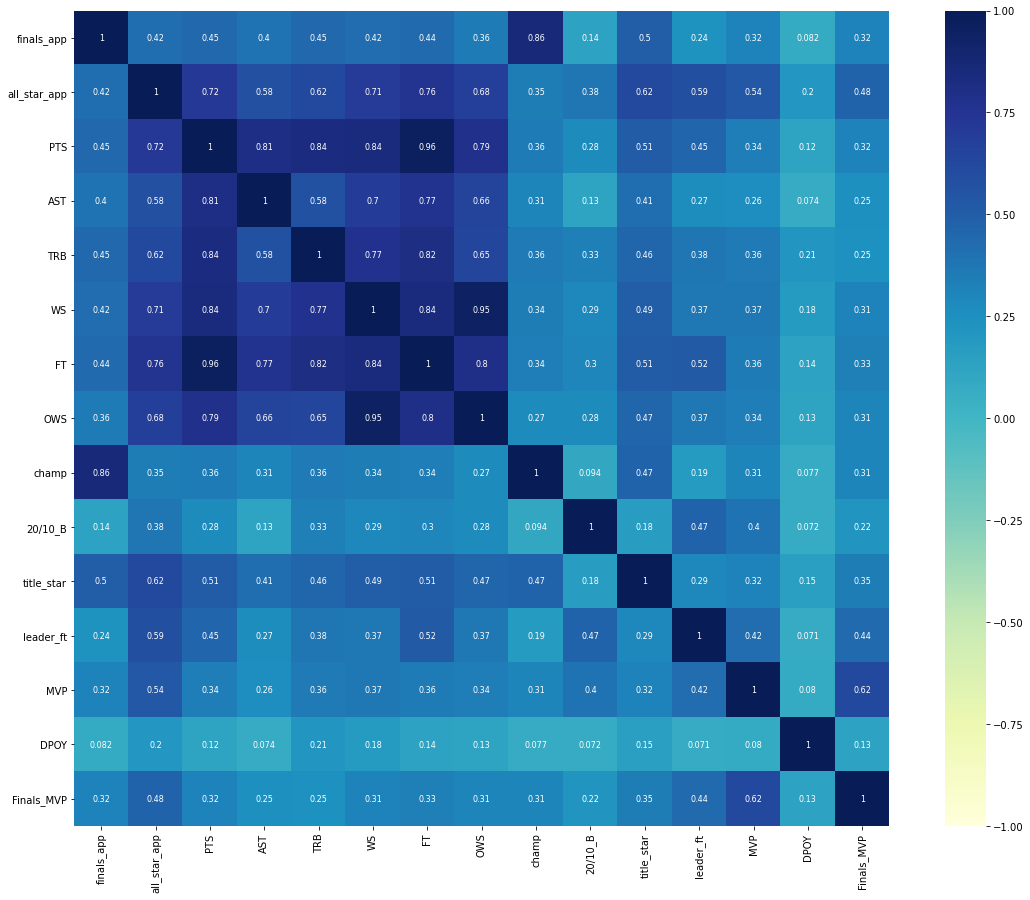

In [1660]:
correlation_features = ['finals_app', 'all_star_app', 'PTS', 'AST', 'TRB', 'WS', 'FT', 'OWS', 'champ', '20/10_B',\
                        'title_star', 'leader_ft', 'MVP', 'DPOY', 'Finals_MVP']


nba_corr = nba_total[correlation_features].corr()
plt.subplots(figsize=(20,15))

corr = nba_corr
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

sns.heatmap(corr, 
    annot=True, 
    annot_kws={"fontsize":8},
    xticklabels = nba_corr.columns.values, # x labels
    yticklabels = nba_corr.columns.values, # y labels
    vmin = -1, # color scale the min value
    vmax = 1, # color scale the max
    center = 0, # color scale place at the center at 0
    cmap = "YlGnBu", # color palette
    square = True) # each cell will be square-shaped
plt.show();

#### Takeaways

- FG & PTS highly correlated
    - Remove FG <br><br>
- FT & Points highly correlated
    - Remove PTS <br><br>
- OWS & WS highly correlated
    - Remove OWS <br><br>

#### Stat Correlation Bar Chart with HOF Players

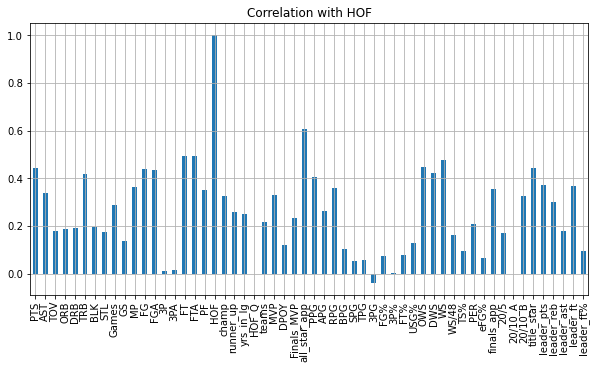

In [1661]:
nba_retired.corrwith(nba_retired.HOF).plot.bar(figsize = (10, 5), title = "Correlation with HOF", 
                                        fontsize = 10,rot = 90, grid = True);

#### PPG by HOF's

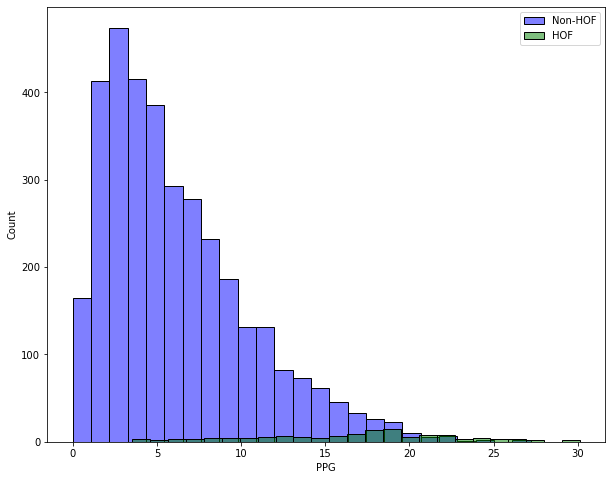

In [1662]:
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(nba_retired[nba_retired['HOF'] == 0].PPG, bins = 25, label = 'Non-HOF', alpha = .50, edgecolor = 'black', color = 'blue')
sns.histplot(nba_retired[nba_retired['HOF'] == 1].PPG, bins = 25, label = 'HOF', alpha = .50, edgecolor = 'black', color = 'green')
plt.legend(loc = 'upper right')

#### Games Played by HOF's

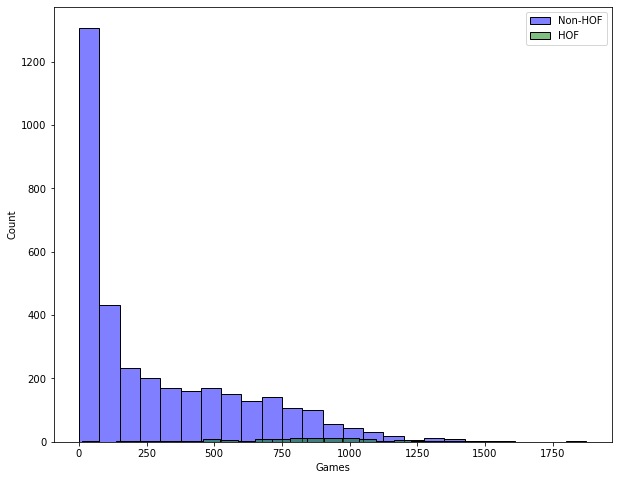

In [1663]:
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(nba_retired[nba_retired['HOF'] == 0].Games, bins = 25, label = 'Non-HOF', alpha = .50, edgecolor = 'black', color = 'blue')
sns.histplot(nba_retired[nba_retired['HOF'] == 1].Games, bins = 25, label = 'HOF', alpha = .50, edgecolor = 'black', color = 'green')
plt.legend(loc = 'upper right')

''

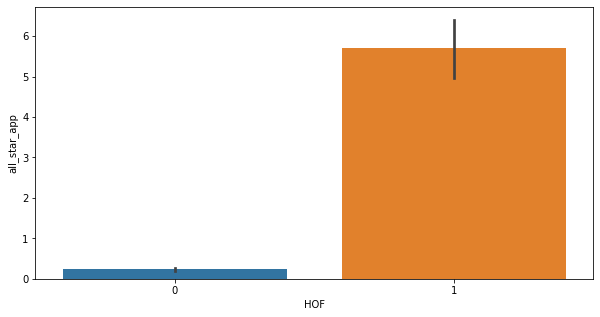

In [1664]:
x_line = nba_retired['HOF']
y_line = nba_retired['all_star_app']

plt.figure(figsize=(10, 5))
sns.barplot(data = nba_total, x = x_line, y = y_line)
;

#### All-Star Appearances by HOF's

<AxesSubplot:xlabel='HOF', ylabel='all_star_app'>

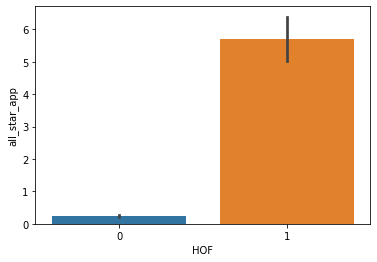

In [1665]:
sns.barplot(x = nba_retired.HOF, y = nba_retired.all_star_app)

#### Points Scored vs PER

<AxesSubplot:xlabel='PTS', ylabel='OWS'>

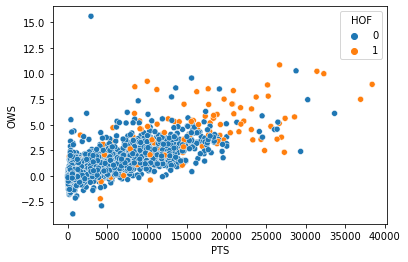

In [1666]:
sns.scatterplot(x = nba_retired.PTS, y = nba_retired.OWS, hue = nba_retired['HOF'])

#### PER for HOF's

''

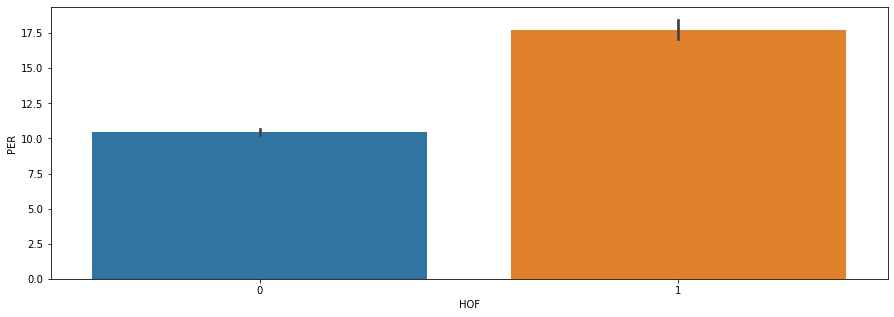

In [1667]:
x_line = nba_retired['HOF']
y_line = nba_retired['PER']

plt.figure(figsize=(15, 5))
sns.barplot(data = nba_retired, x = x_line, y = y_line)
;

#### Average Win Share for HOF's

<AxesSubplot:xlabel='HOF', ylabel='WS'>

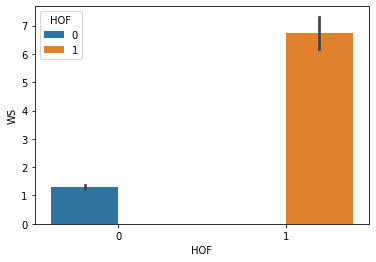

In [1668]:
sns.barplot(x = nba_retired.HOF, y = nba_retired.WS, hue = nba_retired.HOF)

#### Finals Appearances of HOF's

<AxesSubplot:xlabel='finals_app', ylabel='champ'>

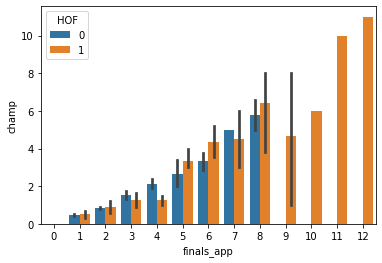

In [1669]:
sns.barplot(x = nba_retired.finals_app, y = nba_retired.champ, hue = nba_retired.HOF)

#### Games Played vs HOF

<AxesSubplot:xlabel='HOF', ylabel='Games'>

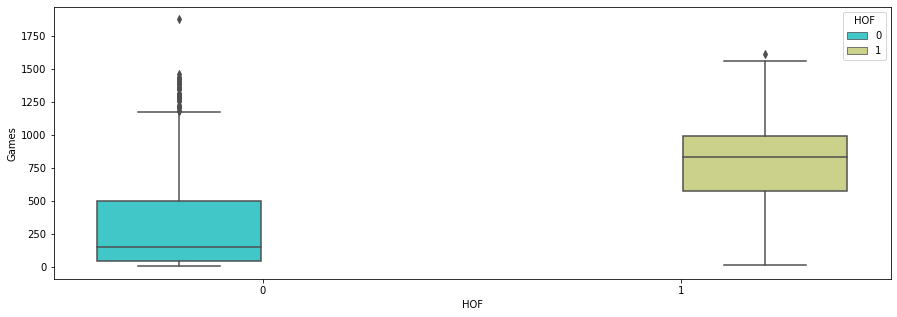

In [1670]:
plt.figure(figsize=(15,5))
sns.boxplot(data = nba_retired, x = 'HOF', y = 'Games', hue = 'HOF', palette = "rainbow")

In [1671]:
nba_retired.sort_values(by = 'AST', ascending = False)

,Player,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,Games,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up,yrs_in_lg,HOF_Q,teams,MVP,DPOY,Finals_MVP,all_star_app,PPG,APG,RPG,BPG,SPG,TPG,3PG,FG%,3P%,FT%,USG%,OWS,DWS,WS,WS/48,TS%,PER,eFG%,finals_app,20/5,20/10_A,20/10_B,title_star,leader_pts,leader_reb,leader_ast,leader_ft,leader_ft%
2070,John Stockton,19711.0,15806.0,4244.0,966.0,3085.0,4051.0,315.0,3265.0,1504.0,1300.0,47764.0,7039.0,13658.0,845.0,2203.0,4788.0,5796.0,3942.0,1,0,2,19,1,19.0,0.0,0.0,0.0,10.0,13.105718,10.509309,2.693484,0.209441,2.170878,2.821809,0.561835,0.515376,0.383568,0.826087,18.678947,7.510526,3.421053,10.926316,0.204158,0.604105,21.468421,0.541421,2,0,0,0,0,0,0,1,0,1
1776,Jason Kidd,17529.0,12091.0,4003.0,1768.0,6957.0,8725.0,450.0,2684.0,1391.0,1350.0,50111.0,6219.0,15557.0,1988.0,5701.0,3103.0,3954.0,2572.0,0,1,3,19,1,21.0,0.0,0.0,0.0,9.0,12.601725,8.692308,6.272466,0.323508,1.929547,2.877786,1.429188,0.399756,0.348711,0.784775,18.757143,3.023810,3.566667,6.600000,0.130000,0.509762,17.666667,0.469524,4,0,0,0,1,0,0,1,0,1
3498,Steve Nash,17387.0,10335.0,3478.0,643.0,2999.0,3642.0,102.0,899.0,1217.0,1053.0,38069.0,6321.0,12892.0,1685.0,3939.0,3060.0,3384.0,1982.0,0,0,0,18,1,18.0,2.0,0.0,0.0,7.0,14.286771,8.492194,2.992605,0.083813,0.738702,2.857847,1.384552,0.490304,0.427774,0.904255,20.261111,6.305556,0.883333,7.222222,0.144389,0.590000,18.600000,0.541833,0,0,0,0,0,0,0,1,0,1
2566,Mark Jackson,12489.0,10334.0,3155.0,1281.0,3682.0,4963.0,117.0,1608.0,1296.0,1092.0,39121.0,4793.0,10731.0,734.0,2213.0,2169.0,2818.0,2230.0,0,0,1,17,1,19.0,0.0,0.0,0.0,1.0,9.636574,7.973765,3.829475,0.090278,1.240741,2.434414,0.566358,0.446650,0.331676,0.769695,16.631579,2.878947,1.968421,4.815789,0.106947,0.514158,15.521053,0.473368,1,0,0,0,0,0,0,1,0,1
2505,Magic Johnson,17707.0,10141.0,3506.0,1601.0,4958.0,6559.0,374.0,1724.0,906.0,763.0,33245.0,6211.0,11951.0,325.0,1074.0,4960.0,5850.0,2050.0,1,5,4,13,1,13.0,3.0,0.0,3.0,11.0,19.544150,11.193157,7.239514,0.412804,1.902870,3.869757,0.358720,0.519705,0.302607,0.847863,22.330769,8.515385,3.492308,11.976923,0.222077,0.609000,23.984615,0.532769,9,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,Sam Sibert,12.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,26.0,4.0,13.0,0.0,0.0,4.0,5.0,4.0,0,0,0,1,1,1.0,0.0,0.0,0.0,0.0,2.400000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.307692,NaN,0.800000,NaN,-0.100000,0.000000,-0.100000,-0.105000,0.395000,6.400000,0.308000,0,0,0,0,0,0,0,0,0,1
3076,Ratko Varda,5.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,6.0,2.0,3.0,0.0,0.0,1.0,1.0,3.0,0,0,0,1,1,1.0,0.0,0.0,0.0,0.0,5.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.666667,NaN,1.000000,34.900000,0.000000,0.000000,0.000000,0.098000,0.727000,15.000000,0.667000,0,0,0,0,0,0,0,0,0,1
1293,Ernest Brown,3.0,0.0,3.0,1.0,5.0,6.0,1.0,0.0,3.0,0.0,21.0,1.0,6.0,0.0,0.0,1.0,4.0,4.0,0,0,0,1,1,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,2.000000,0.333333,0.000000,1.000000,0.000000,0.166667,NaN,0.250000,24.500000,-0.200000,0.000000,-0.200000,-0.349000,0.193000,-9.700000,0.167000,0,0,0,0,0,0,0,0,0,0
1852,Jerome Henderson,16.0,0.0,6.0,2.0,6.0,8.0,1.0,1.0,7.0,0.0,39.0,6.0,16.0,0.0,0.0,4.0,4.0,13.0,0,0,0,2,1,2.0,0.0,0.0,0.0,0.0,2.285714,0.000000,1.142857,0.142857,0.142857,0.857143,0.000000,0.375000,NaN,1.000000,31.950000,-0.100000,0.000000,-0.050000,0.097500,0.537000,17.650000,0.487500,0,0,0,0,0,0,0,0,0,1


## Building Preliminary Model

#### Getting Categorical Variables

In [1672]:
feature_cols = ['finals_app', 'all_star_app', 'AST', 'TRB', 'WS', 'FT', 'title_star', '20/10_B', 'leader_pts', 'champ']

In [1673]:
model_df = nba_retired[feature_cols]
y = nba_retired['HOF']

X = pd.get_dummies(model_df, columns = ['finals_app', 'all_star_app', 'champ'], drop_first = True)

In [1674]:
X.head()

,AST,TRB,WS,FT,title_star,20/10_B,leader_pts,finals_app_1,finals_app_2,finals_app_3,finals_app_4,finals_app_5,finals_app_6,finals_app_7,finals_app_8,finals_app_9,finals_app_10,finals_app_11,finals_app_12,all_star_app_1.0,all_star_app_2.0,all_star_app_3.0,all_star_app_4.0,all_star_app_5.0,all_star_app_6.0,all_star_app_7.0,all_star_app_8.0,all_star_app_9.0,all_star_app_10.0,all_star_app_11.0,all_star_app_12.0,all_star_app_13.0,all_star_app_14.0,all_star_app_15.0,all_star_app_17.0,all_star_app_18.0,champ_1,champ_2,champ_3,champ_4,champ_5,champ_6,champ_7,champ_8,champ_10,champ_11
0,1400.0,9473.0,5.847059,3119.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.0,22.0,-0.200000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,320.0,315.0,0.550000,259.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,147.0,80.0,0.100000,37.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,567.0,377.0,0.587500,207.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1675]:
X.fillna(0, inplace = True)

#### Train Test Split the Data

In [1676]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [1677]:
nba_scaled = StandardScaler()

nba_scaled.fit(X_train)
X_train_sc = nba_scaled.transform(X_train)
X_test_sc = nba_scaled.transform(X_test)

### Trying a Logistic Regression Model

In [1678]:
logreg_model = LogisticRegression(random_state = 42, solver = 'liblinear', C = .1, class_weight = 'balanced')
logreg_model.fit(X_train_sc, y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [1679]:
cross_val_score(logreg_model, X_train_sc, y_train, cv=3)

array([0.93007769, 0.91897891, 0.95782464])

In [1680]:
y_pred = logreg_model.predict(X_test_sc)

In [1681]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.936807,0.305556,0.758621,0.435644


### Confusion Matrix Plot

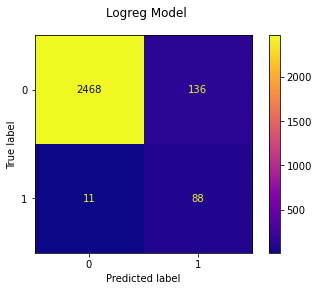

In [1682]:
fig, ax = plt.subplots()

fig.suptitle("Logreg Model")

plot_confusion_matrix(logreg_model, X_train_sc, y_train, ax=ax, cmap="plasma");

### KNN

In [1683]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=7)

In [1684]:
cross_val_score(knn, X_train_sc, y_train, cv=5)

array([0.96672828, 0.96303142, 0.95009242, 0.97777778, 0.96481481])

In [1685]:
y_pred = knn.predict(X_test_sc)

In [1686]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

knn_model = pd.DataFrame([['KNN', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(knn_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.936807,0.305556,0.758621,0.435644
1,KNN,0.973392,0.692308,0.310345,0.428571


#### Decision Tree

In [1687]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sc, y_train)

DecisionTreeClassifier(random_state=42)

In [1688]:
y_pred = dt.predict(X_test_sc)

In [1689]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

dt_model = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(dt_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.936807,0.305556,0.758621,0.435644
1,KNN,0.973392,0.692308,0.310345,0.428571
2,Decision Tree,0.963415,0.409091,0.310345,0.352941


#### XGBoost

In [1690]:
xgb = XGBClassifier()
xgb.fit(X_train_sc, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1691]:
y_pred = xgb.predict(X_test_sc)

In [1692]:
cm = confusion_matrix(y_test, y_pred)

In [1693]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

xgb_model = pd.DataFrame([['XGBoost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(xgb_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.936807,0.305556,0.758621,0.435644
1,KNN,0.973392,0.692308,0.310345,0.428571
2,Decision Tree,0.963415,0.409091,0.310345,0.352941
3,XGBoost,0.972284,0.625000,0.344828,0.444444


### Grid Search

In [1694]:
gs_dt = DecisionTreeClassifier()

params_grid ={
    'criterion':['gini', 'entropy'],
    'max_depth':[None, 5, 3, 2],
    'min_samples_split': [2,10,20]
}

gridsearch_model = GridSearchCV(estimator=gs_dt, param_grid = params_grid, scoring = 'recall')

gridsearch_model.fit(X_train_sc, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 3, 2],
                         'min_samples_split': [2, 10, 20]},
             scoring='recall')

In [1695]:
y_pred = gridsearch_model.predict(X_test_sc)

In [1696]:
best_model = gridsearch_model.best_estimator_
best_model.score(X_test_sc, y_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

gs_model = pd.DataFrame([['Best GS-DT', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(gs_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.936807,0.305556,0.758621,0.435644
1,KNN,0.973392,0.692308,0.310345,0.428571
2,Decision Tree,0.963415,0.409091,0.310345,0.352941
3,XGBoost,0.972284,0.625000,0.344828,0.444444
4,Best GS-DT,0.964523,0.428571,0.310345,0.360000
